In [2]:
# IMPORTS 
import numpy as np
# import matplotlib.pyplot as plt
import pylab as plt
import math

In [72]:
# CONSTANTS
T = 1   # signal period
f = 1   # signal frequency
fs = 10 # sampling frequency
number_of_bits = 100 # number of the random generated bits

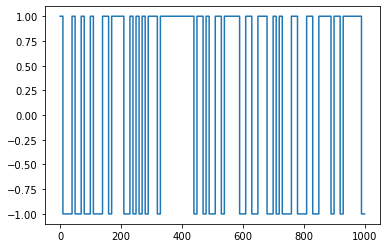

In [77]:
# GENERAL FUNCTIONS
def generatRandomBits():
    # generate a random number with number_of_bits passed 
    return np.random.choice([0, 1], size=(number_of_bits))

def convertToPulses(generated_bits):
    generated_bits[generated_bits == 0] = -1

    signal = np.repeat(generated_bits, fs)

    return signal

def addWhiteGaussianNoise(generated_signal, σ):
    # generate noise with normal distribution with mean = 0 and standard deviation σ = No/2
    white_gaussian_noise = np.random.normal(0, σ, len(generated_signal))
    # print(white_gaussian_noise)
    noisy_signal = generated_signal + white_gaussian_noise

    # random_number = σ**0.5 * np.random.randn(len(generated_signal))

    # print(random_number)
    # noisy_signal = generated_signal + white_gaussian_noise

    return noisy_signal

def calculateProbabilityOfError(sampled_output, input, z):
    # simulation probability of error
    simulation = np.sum(sampled_output != input)/number_of_bits
    # theoretical probability of error
    theoretical = math.erfc(z)
    return theoretical, simulation

generated_bits = generatRandomBits()

sent_bits = np.copy(generated_bits)

signal = convertToPulses(sent_bits)

plt.step(np.arange(0, len(signal)), signal)
plt.show()


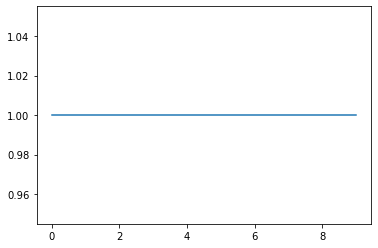

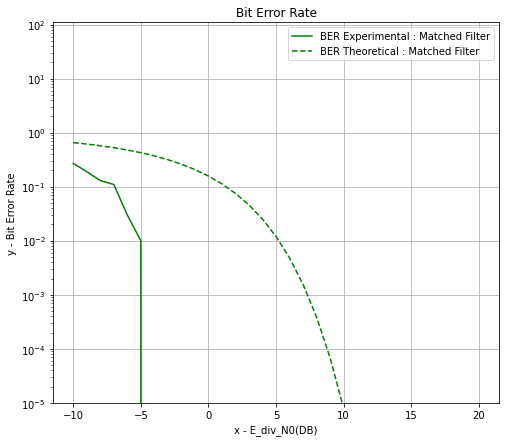

In [85]:
# REQUIREMENT ONE - The receive filter 𝒉(𝒕) is a matched filter with unit energy
𝒉1 = np.ones(fs)
plt.plot(np.arange(0, len(𝒉1)), 𝒉1)
plt.show()

BER_simulation_1 = []
BER_theoretical_1 = []

for E_div_No in range(-10,21):
    No = 10**(E_div_No/10)
    noisy_signal = addWhiteGaussianNoise(signal, 1/(2*No))
    y1 = np.asarray(np.convolve(noisy_signal, 𝒉1))

    # sample the output signal
    y1_sampled = []
    for i in range(fs-1, len(y1), fs):
        y1_sampled.append(y1[i])
    y1_sampled = np.asarray(y1_sampled)

    # threshold with lamda = 0 to decode to 0 and 1
    y1_sampled[y1_sampled <= 0] = 0
    y1_sampled[y1_sampled > 0] = 1 

    theoretical_BER, simulation_BER = calculateProbabilityOfError(y1_sampled, generated_bits, No**0.5)
    BER_theoretical_1.append(math.erfc(No**0.5))
    BER_simulation_1.append(np.sum(y1_sampled != generated_bits)/number_of_bits)

plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_simulation_1, c='green', label='BER Experimental : Matched Filter')
plt.plot(range(-10, 21), BER_theoretical_1, '--', c='green', label='BER Theoretical : Matched Filter')
plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')
plt.legend()
plt.grid()
plt.show()




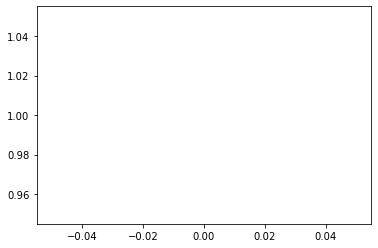

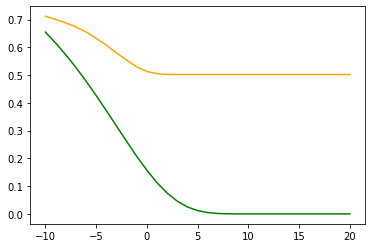

In [25]:
# REQUIREMENT TWO - The receive filter 𝒉(𝒕) is not existent (i.e. 𝒉(𝒕) = 𝜹(𝒕))
𝒉2 = np.ones(1)
plt.plot([0], 𝒉2)
plt.show()

BER_simulation_2 = []
BER_theoretical_2 = []

for E_div_No in range(-10,21):
    No = 10**(E_div_No/10)
    noisy_signal = addWhiteGaussianNoise(signal, 1/(2*No))
    y2 = np.asarray(np.convolve(noisy_signal, 𝒉2))

    # sample the output signal
    y2_sampled = []
    for i in range(fs-1, len(y2), fs):
        y2_sampled.append(y2[i])
    y2_sampled = np.asarray(y2_sampled)

    # threshold with lamda = 0 to decode to 0 and 1
    y2_sampled[y2_sampled <= 0] = 0
    y2_sampled[y2_sampled > 0] = 1 

    theoretical_BER, simulation_BER = calculateProbabilityOfError(y2_sampled, generated_bits, No**0.5)
    BER_theoretical_2.append(theoretical_BER)
    BER_simulation_2.append(simulation_BER)

plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_theoretical_2, c='green', label='BER Experimental : Matched Filter')
plt.plot(range(-10, 21), BER_theoretical_2, '--', c='green', label='BER Theoretical : Matched Filter')
plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')
plt.legend()
plt.grid()
plt.show()

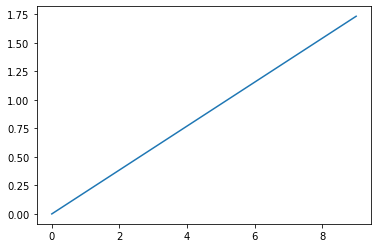

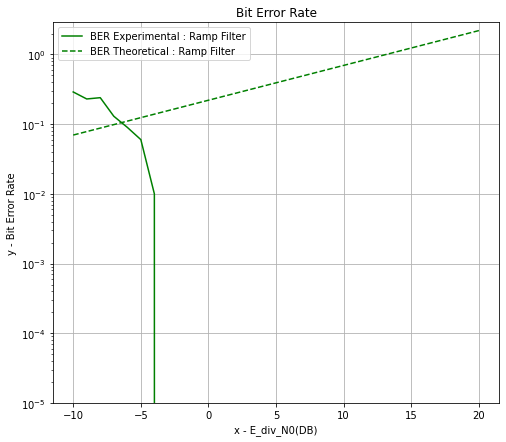

In [87]:
# REQUIREMENT THREE - The receive filter 𝒉(𝒕) has the following impulse response
𝒉3 = math.sqrt(3) * np.linspace(0, 1/f, fs)
plt.plot(np.arange(0, len(𝒉3)), 𝒉3)
plt.show()

BER_simulation_3 = []
BER_theoretical_3 = []

for E_div_No in range(-10,21):
    No = 10**(E_div_No/10)
    noisy_signal = addWhiteGaussianNoise(signal, 1/(2*No))
    y3 = np.asarray(np.convolve(noisy_signal, 𝒉3))

    # sample the output signal
    y3_sampled = []
    for i in range(fs-1, len(y3), fs):
        y3_sampled.append(y3[i])
    y3_sampled = np.asarray(y3_sampled)

    # threshold with lamda = 0 to decode to 0 and 1
    y3_sampled[y3_sampled <= 0] = 0
    y3_sampled[y3_sampled > 0] = 1 

    theoretical_BER, simulation_BER = calculateProbabilityOfError(y3_sampled, generated_bits, No**0.5)
    BER_theoretical_3.append(math.erfc(3**0.5/2) * (No**0.5))
    BER_simulation_3.append(np.sum(y3_sampled != generated_bits)/number_of_bits)

plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_simulation_3, c='green', label='BER Experimental : Ramp Filter')
plt.plot(range(-10, 21), BER_theoretical_3, '--', c='green', label='BER Theoretical : Ramp Filter')
plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')
plt.legend()
plt.grid()
plt.show()